해당 소스코드는 전 세계의 데이터를 기준으로 하기 때문에 핵발전이 낮게 나옴.  
핵 발전을 하는 국가만 따로 추출해서 기계학습을 돌리는 과정이 필요할 것으로 보임 

In [1]:
import pandas as pd
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.font_manager as fm

# 한글 깨짐 방지 
plt.rcParams['font.family'] = 'NanumGothic' 

In [2]:
df = pd.read_csv('C:/k-project\source\model(최종)-업로드X/00_국가별_데이터_전처리_세계_추가_수정.csv')  # 경로 수정 필요. 추후 통합하는 걸로

In [3]:
df['COUNTRY'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo-Brazzaville', 'Congo-Kinshasa', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands',

In [4]:
df.columns

Index(['COUNTRY', 'Year', 'Biomass and waste (billion kWh)',
       'CO2 emissions (MMtonnes CO2)', 'Coal (quad Btu)',
       'Coal and coke (MMtonnes CO2)', 'Consumed natural gas (MMtonnes CO2)',
       'Consumption (quad Btu)', 'Fossil fuels (billion kWh)', 'GDP',
       'Generation (billion kWh)', 'Geothermal (billion kWh)',
       'Hydroelectric pumped storage (billion kWh)',
       'Hydroelectricity (billion kWh)', 'Natural gas (quad Btu)',
       'Non-hydroelectric renewables (billion kWh)', 'Nuclear (billion kWh)',
       'Nuclear (quad Btu)', 'Nuclear, renewables, and other (quad Btu)',
       'Petroleum and other liquids (MMtonnes CO2)',
       'Petroleum and other liquids (quad Btu)', 'Population',
       'Renewables (billion kWh)', 'Renewables and other (quad Btu)',
       'Solar (billion kWh)', 'Solar, tide, wave, fuel cell (billion kWh)',
       'Tide and wave (billion kWh)', 'Wind (billion kWh)',
       'electricity net consumption (billion kWh)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9744 entries, 0 to 9743
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   COUNTRY                                     9744 non-null   object 
 1   Year                                        9744 non-null   int64  
 2   Biomass and waste (billion kWh)             9744 non-null   float64
 3   CO2 emissions (MMtonnes CO2)                9744 non-null   float64
 4   Coal (quad Btu)                             9744 non-null   float64
 5   Coal and coke (MMtonnes CO2)                9744 non-null   float64
 6   Consumed natural gas (MMtonnes CO2)         9744 non-null   float64
 7   Consumption (quad Btu)                      9744 non-null   float64
 8   Fossil fuels (billion kWh)                  9744 non-null   float64
 9   GDP                                         9744 non-null   float64
 10  Generation (

quad Btu: 소비  
billion kWh: 생산 

x에 필요한것: 발전. (화력발전, 원자력, 친환경)  
y에 필요한것: 에너지 소비(전기)

In [6]:
# 상위 - 하위 카테고리로 묶여 있는 값 제거. 상위 범주 안에 이미 해당 값들이 포함되어 있음 
X = df[['Renewables (billion kWh)', 'Fossil fuels (billion kWh)', 'Nuclear (billion kWh)']]

X

,Renewables (billion kWh),Fossil fuels (billion kWh),Nuclear (billion kWh)
0,0.711000,0.231000,0.0
1,0.721000,0.271000,0.0
2,0.707000,0.245000,0.0
3,0.746000,0.254000,0.0
4,0.757000,0.262000,0.0
...,...,...,...
9739,4.130900,3.218560,0.0
9740,5.254980,3.932020,0.0
9741,4.380599,3.850240,0.0
9742,3.938347,3.655663,0.0


In [7]:
y = df['electricity net consumption (billion kWh)']

y

0       0.876060
1       0.922560
2       0.885360
3       0.930000
4       0.947670
          ...   
9739    7.838552
9740    8.455186
9741    7.786427
9742    8.131027
9743    8.340104
Name: electricity net consumption (billion kWh), Length: 9744, dtype: float64

In [8]:
# 코드 10-2
# 스탯츠모델스, 사이킷런 ==========
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression

# 선형 회귀모형 형태(종속변수 ~ 독립변수1 + 독립변수2 + 독립변수3 + ···)
# 단순 선형 회귀분석 ==========

fit = ols('y~X', data=df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.347e+06
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:31:33   Log-Likelihood:                -43552.
No. Observations:                9744   AIC:                         8.711e+04
Df Residuals:                    9740   BIC:                         8.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7942      0.216     -3.682      0.0

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004, shuffle = False)
# 데이터 스케일링
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [10]:
from sklearn.svm import LinearSVR

# 성능 지표를 저장할 리스트를 생성합니다.
train_maes = []
train_rmses = []
test_maes = []
test_rmses = []

alphas = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 100]
for alpha in alphas:
    model = LinearSVR(epsilon=alpha) # random_state=1
    model.fit(X_train, y_train)

    # 훈련 데이터에 대한 성능 확인
    train_pred = model.predict(X_train)
    train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
    y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
    train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
    train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
    pred = model.predict(X_test)
    pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
    test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
    test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
    train_maes.append(train_mae)
    train_rmses.append(train_rmse)
    test_maes.append(test_mae)
    test_rmses.append(test_rmse)
    print('알파값: ', alpha)
    print("Train MAE: {:.2f}".format(train_mae))
    print("Train RMSE: {:.2f}".format(train_rmse))
    print("Test MAE: {:.2f}".format(test_mae))
    print("Test RMSE: {:.2f}".format(test_rmse), '\n')

    print('R^2', r2_score(y_test, pred))



C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


알파값:  0.0001
Train MAE: 4.04
Train RMSE: 22.21
Test MAE: 5.77
Test RMSE: 25.50 

R^2 0.9998190318634297


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


알파값:  0.001
Train MAE: 4.23
Train RMSE: 22.38
Test MAE: 7.77
Test RMSE: 41.50 

R^2 0.999520699944662


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


알파값:  0.01
Train MAE: 4.28
Train RMSE: 22.17
Test MAE: 5.36
Test RMSE: 20.40 

R^2 0.9998841769607673


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


알파값:  0.05
Train MAE: 7.15
Train RMSE: 22.24
Test MAE: 9.07
Test RMSE: 27.95 

R^2 0.9997826011195772
알파값:  0.1
Train MAE: 11.96
Train RMSE: 23.67
Test MAE: 16.11
Test RMSE: 52.49 

R^2 0.9992334279391141
알파값:  0.5
Train MAE: 102.86
Train RMSE: 104.21
Test MAE: 112.10
Test RMSE: 139.44 

R^2 0.9945897452006784
알파값:  2
Train MAE: 15.64
Train RMSE: 38.24
Test MAE: 33.08
Test RMSE: 134.07 

R^2 0.9949985609238038
알파값:  5
Train MAE: 21.33
Train RMSE: 72.39
Test MAE: 58.86
Test RMSE: 296.95 

R^2 0.975464322243346
알파값:  10
Train MAE: 30.79
Train RMSE: 114.49
Test MAE: 115.98
Test RMSE: 657.93 

R^2 0.8795579188126722
알파값:  100
Train MAE: 78.66
Train RMSE: 284.84
Test MAE: 318.83
Test RMSE: 1912.19 

R^2 -0.01737270564340343


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [11]:
from sklearn.svm import LinearSVR

model = LinearSVR(epsilon=0.005, random_state=1) # random_state=1
model.fit(X_train, y_train)

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
pred = model.predict(X_test)
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
train_maes.append(train_mae)
train_rmses.append(train_rmse)
test_maes.append(test_mae)
test_rmses.append(test_rmse)

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))
print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

print('R^2', r2_score(y_test, pred))



Train MAE: 4.33
Train RMSE: 22.11
Test MAE: 5.30
Test RMSE: 19.25 

R^2 0.9998968768064722


C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


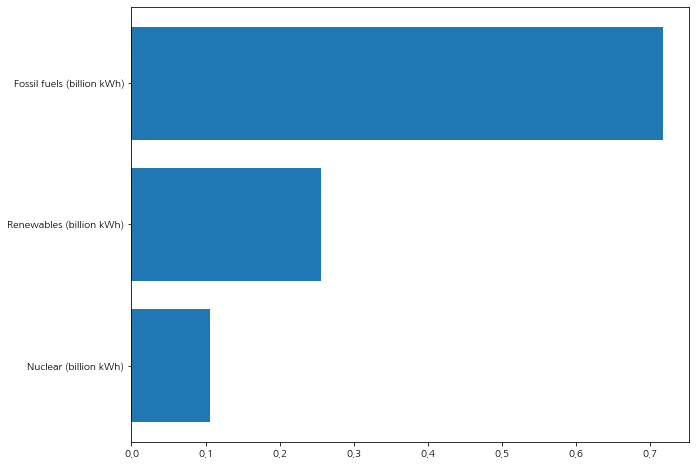

In [12]:
# Feature importance, feature 선언
importances = model.coef_
features = X.columns

# 중요한 변수 순으로 정렬
indices = np.argsort(importances)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, importances[indices])
plt.show()

In [13]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.5, random_state=1) # random_state=1
model.fit(X_train, y_train)

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
pred = model.predict(X_test)
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
train_maes.append(train_mae)
train_rmses.append(train_rmse)
test_maes.append(test_mae)
test_rmses.append(test_rmse)

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))
print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

print('R^2', r2_score(y_test, pred))



Train MAE: 5.09
Train RMSE: 21.70
Test MAE: 6.48
Test RMSE: 21.88 

R^2 0.999866815647207


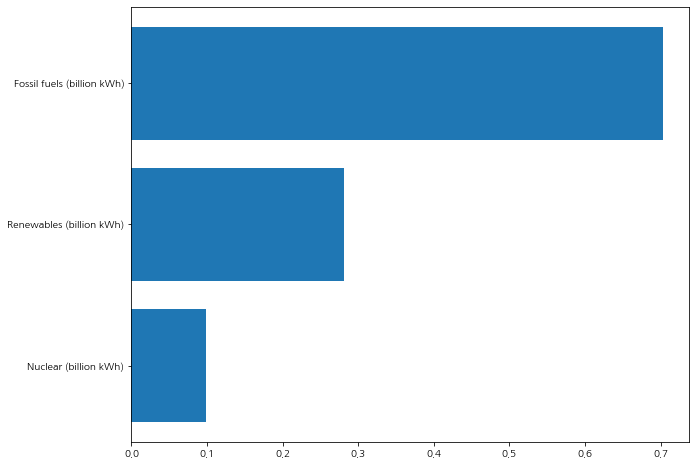

In [14]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()

In [15]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.001, random_state=1) # random_state=1
model.fit(X_train, y_train)

# 훈련 데이터에 대한 성능 확인
train_pred = model.predict(X_train)
train_pred_inverse = scaler_y.inverse_transform(train_pred.reshape(-1, 1)).ravel()
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()
train_mae = mean_absolute_error(y_train_inverse, train_pred_inverse)
train_rmse = np.sqrt(mean_squared_error(y_train_inverse, train_pred_inverse))

    # 테스트 데이터에 대한 성능 확인
pred = model.predict(X_test)
pred_inverse = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
test_mae = mean_absolute_error(y_test_inverse, pred_inverse)
test_rmse = np.sqrt(mean_squared_error(y_test_inverse, pred_inverse))

    # 성능 지표를 리스트에 추가합니다.
train_maes.append(train_mae)
train_rmses.append(train_rmse)
test_maes.append(test_mae)
test_rmses.append(test_rmse)

print("Train MAE: {:.2f}".format(train_mae))
print("Train RMSE: {:.2f}".format(train_rmse))
print("Test MAE: {:.2f}".format(test_mae))
print("Test RMSE: {:.2f}".format(test_rmse), '\n')

print('R^2', r2_score(y_test, pred))



Train MAE: 5.05
Train RMSE: 21.70
Test MAE: 6.37
Test RMSE: 21.89 

R^2 0.9998666935407212


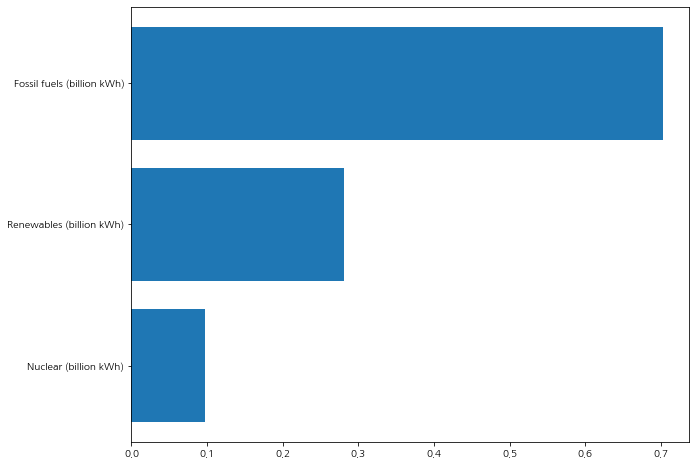

In [16]:
# Feature coefficients, feature 선언
coefficients = model.coef_
features = X.columns

# coefficients 순으로 정렬
indices = np.argsort(coefficients)
sorted_features = [features[i] for i in indices]

# 그래프 크기 지정
plt.figure(figsize=(10, 8))

# 막대그래프 show
plt.barh(sorted_features, coefficients[indices])
plt.show()